<a href="https://colab.research.google.com/github/sehxxnee/AI/blob/main/AI_September.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BFS(너비 우선 탐색)


---

후속 노드로 확장되기 전에 모든 이웃 노드로 확장한다.



In [ ]:
graph = {
    '1' : ['2', '3', '4'],
    '2' : ['5'],
    '3' : ['6'],
    '4' : ['6'],
    '5' : ['7'],
    '6' : ['7'],
    '7' : []
}

visited = []
queue = []

def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)
  while queue: #visit each node
    m = queue.pop(0)
    print(m, end = " ")
    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
print("Breadth-First Search")
bfs(visited, graph, '1')

Breadth-First Search
1 2 3 4 5 6 7 


The path from S to K is: S->A->B->C->D->G->H->E->F->I->K


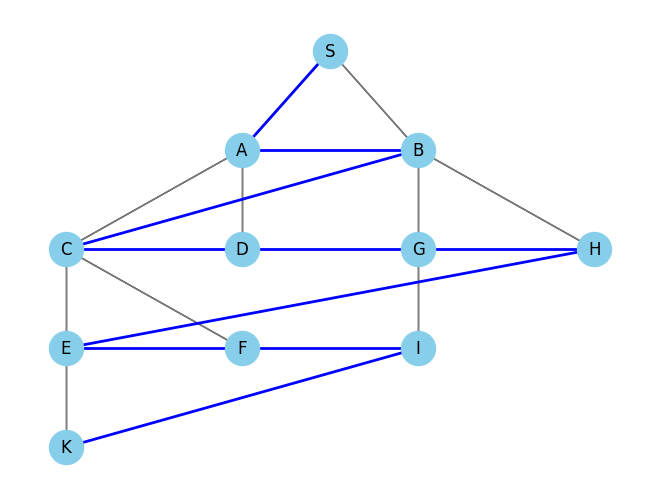

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)
  while queue:
    m = queue.pop(0)
    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

G=nx.Graph()
edges = [('S', 'A'), ('S', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'G'), ('B', 'H'), ('C', 'E'),('C', 'F'), ('G', 'I'), ('E', 'K')]
G.add_edges_from(edges)
visited = []
queue = []
bfs(visited, G, 'S')
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size = 600, node_color = 'skyblue')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color = 'gray')
highlighted_edges = [(visited[i], visited[i+1]) for i in range(len(visited)-1)]
nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, edge_color = 'blue', width=2)
print(f"\nThe path from S to K is: {'->'.join(visited)}")

# DFS (깊이 우선 탐색)

---
가장 깊은 노드를 먼저 확장한다.


The path from S to K is: S -> A -> B -> D -> E -> C -> G -> H -> I -> K -> J


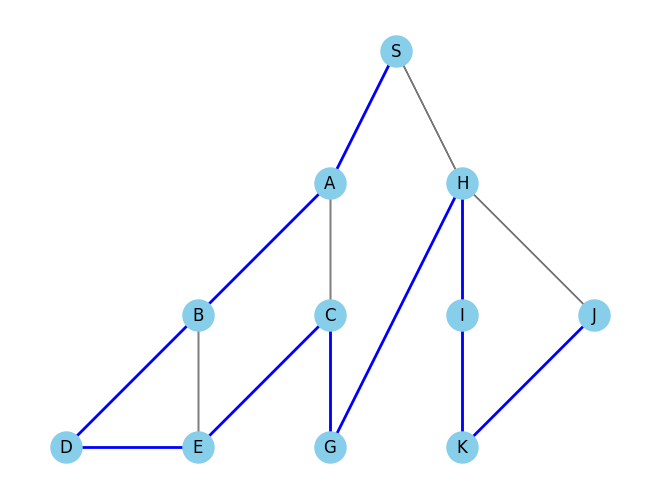

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# 그래프 생성
G = nx.Graph()
edges = [('S', 'A'), ('S', 'H'), ('A', 'B'), ('A', 'C'), ('B', 'D'),
         ('B', 'E'), ('C', 'G'), ('H', 'I'), ('H', 'J'), ('I','K')]
G.add_edges_from(edges)

# DFS 탐색
visited = []
dfs(visited, G, 'S')

# 그래프 그리기
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')

# 탐색 경로 하이라이트
highlighted_edges = [(visited[i], visited[i + 1]) for i in range(len(visited) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, edge_color='blue', width=2)

# 결과 출력
print(f"The path from S to K is: {' -> '.join(visited)}")

plt.show()

In [ ]:
#DFS

graph = {
    '1':['2', '3', '4'],
    '2' : ['5'],
    '3' : ['6'],
    '4' : ['6'],
    '5' : ['7'],
    '6' : ['7'],
    '7' : []
}

visited = set()

def dfs (visited, graph, node):
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

print("Following is the Depth-First Search ")
dfs(visited, graph, '1')

Following is the Depth-First Search 
1
2
5
7
3
6
4


In [ ]:
# 그래프 정의
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['G'],
    'D': [],
    'E': ['F'],
    'F': []
}

path = []  # 경로를 저장할 리스트

# DFS 함수 정의
def DFS(currentNode, destination, graph, maxDepth, curList):
    print(f"Checking for destination: {currentNode}")
    curList.append(currentNode)

    if currentNode == destination:
        path.append(list(curList))
        return True

    if maxDepth <= 0:
        path.append(list(curList))
        return False

    for node in graph[currentNode]:
        if DFS(node, destination, graph, maxDepth - 1, curList):
            return True
        curList.pop()  # 백트래킹

    return False

# 반복적인 깊이 제한 DFS 함수 정의
def iterativeDDFS(currentNode, destination, graph, maxDepth):
    for depth in range(maxDepth + 1):  # maxDepth까지 탐색
        curList = []
        if DFS(currentNode, destination, graph, depth, curList):
            return True
    return False

# 함수 실행 및 결과 출력
if not iterativeDDFS('A', 'G', graph, 4):
    print("Path is not available")
else:
    print("A path exists")
    print("Path:", path)

Checking for destination: A
Checking for destination: A
Checking for destination: B
Checking for destination: C
Checking for destination: A
Checking for destination: B
Checking for destination: D
Checking for destination: E
Checking for destination: C
Checking for destination: G
A path exists
Path: [['A'], ['A', 'B'], ['A', 'C'], ['A', 'B', 'D'], ['A', 'B', 'E'], ['A', 'C', 'G']]


#Uniform Cost Search (균일 비용 탐색)
출발 노드에서 목표 노드까지의 최소 비용 경로를 찾기 위한 방식

In [ ]:
import heapq

class Node:
    def __init__(self, name, cost):
        self.name = name
        self.cost = cost

    def __lt__(self, other):
        return self.cost < other.cost

def uniform_cost_search(graph, start, goal):
    visited = set()
    priority_queue = [(0, Node(start, 0))]  # 초기 비용 0 설정
    while priority_queue:
        cost, current_node = heapq.heappop(priority_queue)

        if current_node.name in visited:
            continue
        visited.add(current_node.name)

        # 목표 노드에 도달하면 비용 반환
        if current_node.name == goal:
            return cost

        # 인접 노드 탐색
        for neighbor, neighbor_cost in graph[current_node.name]:
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + neighbor_cost, Node(neighbor, cost + neighbor_cost)))

    # 목표 노드로 가는 경로가 없을 때
    return float('inf')

# 그래프 예시
graph = {
    'S': [('A', 1), ('B', 4)],
    'A': [('C', 3), ('D', 2)],
    'B': [('G', 5)],
    'C': [('E', 5)],
    'D': [('G', 5)],
    'E': [('G', 3)]
}

start_node = 'S'
goal_node = 'G'

result = uniform_cost_search(graph, start_node, goal_node)
if result != float('inf'):
    print(f"The cost of the cheapest path from {start_node} to {goal_node} is {result}")
else:
    print(f"There is no path from {start_node} to {goal_node}")

The cost of the cheapest path from S to G is 8


##Greedy Search

In [ ]:
def greedy(graph, H_table, start, goal):
  visited=set()
  path=[]
  current_node= start
  while current_node !=goal:
    path.append(current_node)
    visited.add(current_node)
    neighbors=graph[current_node]
    if not neighbors:
      return None
    next_node= min(neighbors,key=lambda x: H_table[x[0]])
    current_node=next_node[0]
    if current_node in visited:
      return None
  path.append(goal)
  return path

graph = {
    'S' : [('A',3), ('B', 2)],
    'A' : [('C', 4), ('D',1)],
    'B' : [('E',3), ('F',1)],
    'E' : [('H', 5)],
    'F' : [('I',2), ('G', 3)],
}

H_table={
    'S' : 12,
    'A' : 4,
    'B' : 2,9,
    'C' : 4,
    'D' : 7,
    'E' :
    'F' :
}]

In [ ]:
import heapq

def astar(graph, H_table, start, goal):
  open_list=[(0, start, [])]
  closed_set=set()
  while open_list:
    f, current_node, path, heapq.heappop(open_list)
    if current_node--goal:
      return path+[current_node]
    closed_set.add(current_node)
    for neighbor, cost in graph[current_node]:
      if neighbor not in closed_set:
        g=f-H_table[current_node]+cost+H_table[neighbor]
        heapq.heappush(open_list, (g, neighbor, path+[current_node]))
  return None

graph = {
    'S' : [('A',1), ('G', 10)],
    'A' : [('B', 2), ('C',1)],
    'B' : [('D', 5)],
    'C' : [('D',3), ('G',4)],
}

H_table={
    'A' : 3,
    'B' : 4,
    'C' : 2,
    'D' : 6,
    'S' :5,
    'G' 0:
}]

In [ ]:
A_STAR 알고리즘

DISTANCE WITH MY COUNTRY -> 인터넷 검색해서 바꿔쓰기

ASSIGNMENT : NAVIGATION